In [505]:
%matplotlib inline
import matplotlib.pyplot as plt

## Some Imports

In [506]:
import os
import torch
import random
import pandas as pd

#pytorch
import torch
import torchvision.transforms as T
from PIL import Image

from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from skimage import io, transform
from scipy.misc import imresize

In [553]:
_MAP_LIST = ["Yes", "No", "Up", "Down", "Left", "Right", "On",
             "Off", "Stop", "Go", "Zero", "One", "Two", "Three", 
             "Four", "Five", "Six", "Seven", "Eight", "Nine",
            "Bed", "Bird", "Cat", "Dog", "Happy", "House",
             "Marvin", "Sheila", "Tree", "Wow", "background"]

_MAP = {}
print ((_MAP_LIST[30]))
for i, m in enumerate(_MAP_LIST):
    if i > 10 and i < 30:
        _MAP[m.lower()] = 10
    elif i == 30:
        _MAP[m.lower()] = 11
    else:
        _MAP[m.lower()] = i
print(_MAP)

background
{'sheila': 10, 'seven': 10, 'right': 5, 'house': 10, 'one': 10, 'four': 10, 'zero': 10, 'go': 9, 'yes': 0, 'down': 3, 'no': 1, 'wow': 10, 'six': 10, 'two': 10, 'bird': 10, 'happy': 10, 'marvin': 10, 'stop': 8, 'five': 10, 'background': 11, 'on': 6, 'off': 7, 'dog': 10, 'tree': 10, 'up': 2, 'bed': 10, 'cat': 10, 'nine': 10, 'three': 10, 'eight': 10, 'left': 4}


In [509]:
print(_MAP)
print(len(_MAP))
files = os.listdir('train_data/')


{'sheila': 20, 'seven': 17, 'right': 5, 'house': 20, 'one': 11, 'four': 14, 'zero': 10, 'go': 9, 'yes': 0, 'down': 3, 'no': 1, 'wow': 20, 'six': 16, 'two': 12, 'bird': 20, 'happy': 20, 'marvin': 20, 'stop': 8, 'five': 15, 'on': 6, 'off': 7, 'dog': 20, 'tree': 20, 'up': 2, 'bed': 20, 'cat': 20, 'nine': 19, 'three': 13, 'eight': 18, 'left': 4}
30


In [255]:
random.shuffle(files)

In [20]:

print files[0].split('_')[0]


no


In [33]:
import pandas

In [554]:
class FormalizeDataset():
    def __init__(self, in_path, out_file):
        self.in_path = in_path
        self.out_file = out_file
        self.delim = '_'
        self.files = os.listdir(in_path)
        random.shuffle(self.files)
    
    def formalize(self, override=False):
        with open(self.out_file, 'w') as f:
            if not override:
                for fl in self.files:
                    if fl is not None:
                        try:
                            f.write("%s, %s, %d\n" % (fl, fl.split('_')[0], _MAP[fl.split('_')[0]]))
                        except KeyError:
                            print ("weird Key -> %s, %s" % (fl, fl.split('_')[1]))
                            q = fl.split('_')
                            if len(q)>1 and q[1] == "backgroud":
                                f.write("%s, %s, %d" % (fl, q[1], _MAP[q[1]]))
                            
            else:
                for fl in self.files:
                    f.write("%s\n" % (fl))
            
f_d = FormalizeDataset('train_data_100/', 'dat_list.csv')
f_d.formalize()
    

weird Key -> _background_noise__running_tap.jpeg, background
weird Key -> _background_noise__white_noise.jpeg, background
weird Key -> _background_noise__exercise_bike.jpeg, background
weird Key -> _background_noise__dude_miaowing.jpeg, background
weird Key -> _background_noise__doing_the_dishes.jpeg, background


In [512]:
class ReadAndStack(FormalizeDataset):
    def __init__(self, csv_in, train_dir, m):
        self.csv_in = csv_in
        self.train_dir = train_dir
        FormalizeDataset.__init__(self, self.train_dir, self.csv_in)
        self.formalize()
        self.dataset_df = pd.read_csv(self.csv_in)
        self.m = m
    
    def __len__(self):
        return(len(self.dataset_df))
    
    def __getitem__(self, i):
        ipath = os.path.join(self.train_dir, self.dataset_df.iloc[i, 0])
        images = np.array(Image.open(ipath))
        image_scaled = imresize(images, (40, 64))
        image_scaled = image_scaled.reshape(1, image_scaled.shape[0], 
                                           image_scaled.shape[1])
        image = []
#         print "shape: %d" % (images.shape[1])
        images = images.T
        if images.shape[0] > self.m:
            
            for i in range(0, images.shape[0]-self.m):
                image = np.append(image, images[:][i:i+self.m].T)
#             print(image.size)
#             print image.shape
            image = image.reshape(images.shape[0]-self.m,
                                  images.shape[1], self.m)
            images = images.T
            images = images.reshape(1, images.shape[0], images.shape[1])
            return {'image':image,'class':self.dataset_df.iloc[i, 1] ,
                    'label': self.dataset_df.iloc[i, 2], 
                    'raw':images,
                    'scaled':image_scaled
                   }
        else:
            images = images.T
            image = images.reshape(1, image.shape[0], image.shape[1])
            return {'image':image,'class':self.dataset_df.iloc[i, 1] ,
                    'label': self.dataset_df.iloc[i, 2], 
                    'raw':images.reshape(1, images.shape[0], images.shape[1]),
                    'scaled':image_scaled}
        

weird Key -> _background_noise__doing_the_dishes.jpeg
weird Key -> _background_noise__exercise_bike.jpeg
weird Key -> _background_noise__white_noise.jpeg
weird Key -> _background_noise__dude_miaowing.jpeg
weird Key -> _background_noise__running_tap.jpeg
(1, 40, 64)


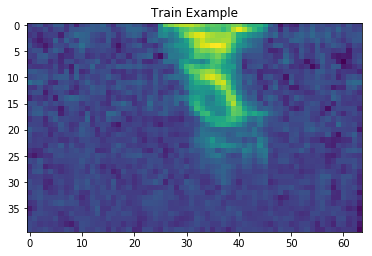

In [517]:
t_readif = ReadAndStack('train_data.csv', 'train_data_100/', 32)
#plt.imshow(t_readif[2]['image'][67])
plt.imshow(t_readif[2]['scaled'][0])
print(t_readif[2]['scaled'].shape)
plt.title("Train Example")
data_loader =  DataLoader(t_readif, batch_size=4, shuffle=True, num_workers=4)


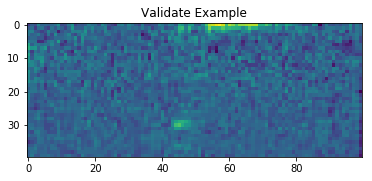

In [516]:
v_readif = ReadAndStack('valid_data.csv', 'validation_data_100/', 32)
plt.imshow(v_readif[55]['raw'][0])
plt.title("Validate Example")
v_data_loader = DataLoader(v_readif, batch_size=4, shuffle=True, num_workers=4)

In [257]:
class ReadImage():
    def __init__(self, csv_in, train_dir):
        self.csv_in = csv_in
        self.train_dir = train_dir
        self.dataset_df = pd.read_csv(self.csv_in)
    
    def __len__(self):
        return len(self.dataset_df)
    
    def __getitem__(self, i):
        ipath = os.path.join(self.train_dir, self.dataset_df.iloc[i, 0])
        image = np.array(Image.open(ipath))
        image = image.reshape(1,image.shape[0],image.shape[1])
        return {'image':image,'class':self.dataset_df.iloc[i, 1] , 'label': self.dataset_df.iloc[i, 2]}

ix = ReadImage('dat_list.csv', 'train_data/')
print ix[2]['label']
print len(ix)



5
51087


## A better reader I suppose

In [282]:
class ReadImageF(FormalizeDataset):
    def __init__(self, csv_in, train_dir):
        self.csv_in = csv_in
        self.train_dir = train_dir
        FormalizeDataset.__init__(self, self.train_dir, self.csv_in)
        self.formalize()
        self.dataset_df = pd.read_csv(self.csv_in)
    
    def __len__(self):
        return len(self.dataset_df)
    
    def __getitem__(self, i):
        ipath = os.path.join(self.train_dir, self.dataset_df.iloc[i, 0])
        image = np.array(Image.open(ipath))
#         print image.shape
        image = image.reshape(1,image.shape[0],image.shape[1])
        return {'image':image,'class':self.dataset_df.iloc[i, 1] , 'label': self.dataset_df.iloc[i, 2]}

weird Key -> .gitignore
(40, 32)


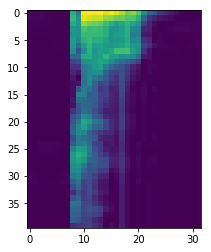

In [283]:
t_readif = ReadImageF('valid.csv', 'validation_data/')
plt.imshow(t_readif[2]['image'][0])

weird Key -> .gitignore
(40, 32)
(40, 32)
(40, 32)
(40, 32)
(1, 40, 32)
6797


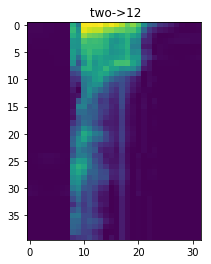

In [284]:
validation_data = ReadImageF('valid.csv', 'validation_data/')
plt.imshow(validation_data[2]['image'][0])
plt.title( validation_data[2]['class']+ "->" + str(validation_data[2]['label']))
print validation_data[2]['image'].shape
print len(validation_data)

validation_loader =  DataLoader(validation_data, batch_size=4, shuffle=True, num_workers=4)

(1, 40, 32)


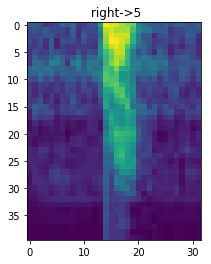

In [260]:
plt.imshow(ix[2]['image'][0])
plt.title( ix[2]['class']+ "->" + str(ix[2]['label']))
print ix[2]['image'].shape


In [261]:
# data_loader =  DataLoader(ix, batch_size=4, shuffle=True, num_workers=4)

In [68]:
import numpy as np

In [69]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [74]:
class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset.
    Arguments:
        num_samples: # of desired datapoints
        start: offset where we should start selecting from
    """
    def __init__(self, num_samples, start = 0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples

In [539]:
def train(model, data, loss_fn, optimizer, num_epochs = 1, 
          print_every = 500, specifier='raw'):
 
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        #g_loss= []
        for t, im_dict in enumerate(data):
#             if specifier=='raw' or specifier == 'scaled':
#                 im_dict[specifier].resize_(4, 1, 40, 64)
            if t == 0:
                print(im_dict[specifier].shape)
            x_var = Variable(im_dict[specifier].type(gpu_dtype))
            y_var = Variable(im_dict['label'].type(gpu_dtype).long())
            optimizer.zero_grad()
            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            #g_loss.append(loss.data[0])
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data[0]))
            loss.backward()
            optimizer.step()
        #fig, ax = plt.subplots(nrows=1, ncols=1)
        #ax.plot(g_loss)
        #ax.set_title('Loss at {} epoch'.format(epoch))
        #fig.savefig('{}.png'.format(epoch))
        #plt.close(fig)

In [521]:
def check_accuracy(model, loader, ytype):
#     if loader.dataset.train:
#         print('Checking accuracy on validation set')
#     else:
#         print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for im_dict in loader:
        x_var = Variable(im_dict['image'].type(gpu_dtype), volatile=True)
        y = Variable(im_dict['label'].type(ytype))
        scores = model(x_var)
        _, preds = torch.max(scores.data, 1)
        num_correct += (preds == y.data).cpu().sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [522]:
def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

In [523]:
def init_weights(m):
    if type(m) == nn.Conv2d:
        n = m.kernel_size[0]*m.kernel_size[1]*m.out_channels
        m.weight.data.normal_(0, np.sqrt(2.0/n))
    if type(m) == nn.BatchNorm2d:
        m.weight.data.fill_(1)
        m.bias.data.zero_()

In [349]:
class SavePredictions(FormalizeDataset):
    def __init__(self, image_dir, in_file,  out_file, m, obj, stack=False,
                 dtype=torch.FloatTensor):
        self.in_file = in_file
        self.out_file = out_file
        self.image_dir = image_dir
        self.m = m
        self.nn = obj
        self.stack = stack
        FormalizeDataset.__init__(self, self.image_dir, self.in_file)
        self.formalize(override=True)
        self.dataset_df = pd.read_csv(self.in_file)
        
    def __len__(self):
        return(len(self.dataset_df))
    
    def __getitem__(self, i):
        ipath = os.path.join(self.train_dir, self.dataset_df.iloc[i, 0])
        images = np.array(Image.open(ipath))
        image = []
        images = images.T 
        if self.stack:
            if images.shape[0] > self.m:
            
                for i in range(0, images.shape[0]-self.m):
                    image = np.append(image, images[:][i:i+self.m].T)
    #             print(image.size)
                print image.shape
                image = image.reshape(images.shape[0]-self.m, images.shape[1],
                                      self.m)
        else:
            images = images.T
            image = images.reshape(1, image.shape[0], image.shape[1])
        return {'image':image, 'file_name':self.dataset_df.iloc[i, 0]}
            
#         print "shape: %d" % (images.shape[1])
        
        
        #ReadAndStack.__init__(self.in_file, self.out_file, self.m)
        # overriding formalize
        #self.formalize(override=True)
        
    def loader(self):
        self.data_loader = DataLoader(self, batch_size=1, shuffle=True, num_workers=1)
    
    def check(self, tensor):
        x_var = Variable(tensor['image']).type(dtype)
        score = self.nn(x_var)
        _, pred = torch.max(soce.data, 1)
        return pred
    
    def run_check(self):
        with open(self.out_file, 'w') as f:
            for image_d in self.data_loader:
                f.write("%s, %s"%(image_d['class']))
                
    

In [536]:
model = nn.Sequential(
                    nn.Conv2d(1, 7, kernel_size=4, stride=2, padding=1),
                    nn.ReLU(inplace=True),
                    nn.BatchNorm2d(7),
                    nn.MaxPool2d((2,2), stride=2),
                    Flatten(),
                    # previously for 40*100
                    #nn.Linear(25*10*7, 120),
                    nn.Linear(1120, 120),
                    nn.ReLU(inplace=True),
                    nn.Linear(120,84),
                    nn.ReLU(inplace=True),
#                     nn.Dropout(0.2),
                    nn.Linear(84,21)
                    #nn.Softmax()
            )

In [535]:
print(25*10*7)

1750


# cnn-trad-fpool3
## Pooling in Frequency
t -> 32, f -> 40

In [543]:
model = nn.Sequential(
                    # (40-8+1)/1=33; (32-20+1)/1 = 13; n->64
                    nn.Conv2d(1, 7, kernel_size=(8, 20), stride=(1,1), padding=1),
                    # 
                    nn.ReLU(inplace=True),
                    # we don't have to do batch norm as the model is shallow. 
                    #nn.BatchNorm2d(6),
                    
                    # q x p -> 3x1
                    # 33/3=11; 13/1=13
                    nn.MaxPool2d((3,1), stride=(3,1)),
                    
                    # (11-4+1)/1 = 8; (13-10+1)/1 = 4; n->64
                    nn.Conv2d(7, 14, kernel_size=(4, 10), stride=(1,1), padding=2),
                    # 
                    nn.ReLU(inplace=True),
                    # we don't have to do batch norm as the model is shallow. 
                    #nn.BatchNorm2d(6),
                    
                    # q x p -> 1x1
#                     nn.MaxPool2d((1,1), stride=(1,1)),
    
                    Flatten(),
                    nn.Linear(7056, 32),
                    nn.ReLU(inplace=True),
                    # DNN
                    nn.Linear(32, 30)
#                     nn.ReLU(inplace=True),
#                     nn.Linear(32,30)
                    #nn.Softmax()
            )

### CNN-ONE-FPOOL3 model
**40% it is giving**

In [531]:
model = nn.Sequential(
                    # (40-8+1)/1=33; (32-32+1)/1 = 1; n->64
                    nn.Conv2d(1, 54, kernel_size=(8, 32), stride=(1,1), padding=0),
                    # 
                    nn.ReLU(inplace=True),
                    # we don't have to do batch norm as the model is shallow. 
                    #nn.BatchNorm2d(6),
                    
                    # q x p -> 3x1
                    # 33/3=11; 1/1=1
                    nn.MaxPool2d((3,1), stride=(3,1)),
                    
    
                    Flatten(),
                    # prviouslu 11*54*1
                    nn.Linear(19602, 32),
                    nn.ReLU(inplace=True),
                    # DNN
                    nn.Linear(32, 128),
                    nn.ReLU(inplace=True),
                    
                    nn.Linear(128, 128),
                    nn.ReLU(inplace=True),
                    nn.Linear(128,30)
                    #nn.Softmax()
            )

In [528]:
# print (32-4+2)/2+1

# print (40-4+2)/2+1
# print 30*5*64
# print 10*5*64
# print 11*54*1
# print "--",8*6*32
# print 1536/32


# print (((40-32)+1))* (((32-8+1)/4))*64
print(11*54*69)


40986


In [ ]:
gpu_dtype = torch.FloatTensor
model.apply(init_weights)
model = model.type(gpu_dtype)
loss_fn = nn.CrossEntropyLoss()
SGDoptimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
RMSoptimizer = optim.RMSprop(model.parameters(), lr=1e-3, weight_decay=1e-3)
Adamoptimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-3)
AGoptimizer = optim.Adagrad(model.parameters(),lr=1e-2, weight_decay=1e-2)
# torch.cuda.synchronize()
train(model, data_loader, loss_fn, 
      Adamoptimizer, num_epochs=1, print_every=100, specifier='scaled')
# check_accuracy(model, data_loader)

In [ ]:
print "against training"
check_accuracy(model, data_loader, torch.LongTensor)
print "against test"
check_accuracy(model, validation_loader, torch.LongTensor)

In [464]:
def prepare_model_settings(label_count, sample_rate, clip_duration_ms,
                           window_size_ms, window_stride_ms,
                           dct_coefficient_count):
  """Calculates common settings needed for all models.
  Args:
    label_count: How many classes are to be recognized.
    sample_rate: Number of audio samples per second.
    clip_duration_ms: Length of each audio clip to be analyzed.
    window_size_ms: Duration of frequency analysis window.
    window_stride_ms: How far to move in time between frequency windows.
    dct_coefficient_count: Number of frequency bins to use for analysis.
  Returns:
    Dictionary containing common settings.
  """
  desired_samples = int(sample_rate * clip_duration_ms / 1000)
  window_size_samples = int(sample_rate * window_size_ms / 1000)
  window_stride_samples = int(sample_rate * window_stride_ms / 1000)
  length_minus_window = (desired_samples - window_size_samples)
  if length_minus_window < 0:
    spectrogram_length = 0
  else:
    spectrogram_length = 1 + int(length_minus_window / window_stride_samples)
  fingerprint_size = dct_coefficient_count * spectrogram_length
  return {
      'desired_samples': desired_samples,
      'window_size_samples': window_size_samples,
      'window_stride_samples': window_stride_samples,
      'spectrogram_length': spectrogram_length,
      'dct_coefficient_count': dct_coefficient_count,
      'fingerprint_size': fingerprint_size,
      'label_count': label_count,
      'sample_rate': sample_rate,
  }

In [465]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os.path
import sys


In [466]:
if True:
  parser = argparse.ArgumentParser()
  parser.add_argument(
      '--data_url',
      type=str,
      # pylint: disable=line-too-long
      default='http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz',
      # pylint: enable=line-too-long
      help='Location of speech training data archive on the web.')
  parser.add_argument(
      '--data_dir',
      type=str,
      default='/tmp/speech_dataset/',
      help="""\
      Where to download the speech training data to.
      """)
  parser.add_argument(
      '--background_volume',
      type=float,
      default=0.1,
      help="""\
      How loud the background noise should be, between 0 and 1.
      """)
  parser.add_argument(
      '--background_frequency',
      type=float,
      default=0.8,
      help="""\
      How many of the training samples have background noise mixed in.
      """)
  parser.add_argument(
      '--silence_percentage',
      type=float,
      default=10.0,
      help="""\
      How much of the training data should be silence.
      """)
  parser.add_argument(
      '--unknown_percentage',
      type=float,
      default=10.0,
      help="""\
      How much of the training data should be unknown words.
      """)
  parser.add_argument(
      '--time_shift_ms',
      type=float,
      default=100.0,
      help="""\
      Range to randomly shift the training audio by in time.
      """)
  parser.add_argument(
      '--testing_percentage',
      type=int,
      default=10,
      help='What percentage of wavs to use as a test set.')
  parser.add_argument(
      '--validation_percentage',
      type=int,
      default=10,
      help='What percentage of wavs to use as a validation set.')
  parser.add_argument(
      '--sample_rate',
      type=int,
      default=16000,
      help='Expected sample rate of the wavs',)
  parser.add_argument(
      '--clip_duration_ms',
      type=int,
      default=1000,
      help='Expected duration in milliseconds of the wavs',)
  parser.add_argument(
      '--window_size_ms',
      type=float,
      default=30.0,
      help='How long each spectrogram timeslice is',)
  parser.add_argument(
      '--window_stride_ms',
      type=float,
      default=10.0,
      help='How long each spectrogram timeslice is',)
  parser.add_argument(
      '--dct_coefficient_count',
      type=int,
      default=40,
      help='How many bins to use for the MFCC fingerprint',)
  parser.add_argument(
      '--how_many_training_steps',
      type=str,
      default='15000,3000',
      help='How many training loops to run',)
  parser.add_argument(
      '--eval_step_interval',
      type=int,
      default=400,
      help='How often to evaluate the training results.')
  parser.add_argument(
      '--learning_rate',
      type=str,
      default='0.001,0.0001',
      help='How large a learning rate to use when training.')
  parser.add_argument(
      '--batch_size',
      type=int,
      default=100,
      help='How many items to train with at once',)
  parser.add_argument(
      '--summaries_dir',
      type=str,
      default='/tmp/retrain_logs',
      help='Where to save summary logs for TensorBoard.')
  parser.add_argument(
      '--wanted_words',
      type=str,
      default='yes,no,up,down,left,right,on,off,stop,go',
      help='Words to use (others will be added to an unknown label)',)
  parser.add_argument(
      '--train_dir',
      type=str,
      default='/tmp/speech_commands_train',
      help='Directory to write event logs and checkpoint.')
  parser.add_argument(
      '--save_step_interval',
      type=int,
      default=100,
      help='Save model checkpoint every save_steps.')
  parser.add_argument(
      '--start_checkpoint',
      type=str,
      default='',
      help='If specified, restore this pretrained model before any training.')
  parser.add_argument(
      '--model_architecture',
      type=str,
      default='conv',
      help='What model architecture to use')
  parser.add_argument(
      '--check_nans',
      type=bool,
      default=False,
      help='Whether to check for invalid numbers during processing')

  FLAGS, unparsed = parser.parse_known_args()

In [470]:
model_settings = prepare_model_settings(
      10,
      FLAGS.sample_rate, FLAGS.clip_duration_ms, FLAGS.window_size_ms,
      FLAGS.window_stride_ms, FLAGS.dct_coefficient_count)

In [480]:
model_settings['fingerprint_size']

# for k,v in model_settings.items:
#     k, v

3920